In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [2]:
data = pd.read_csv('Data/data_cleaned.csv')

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
Survived      891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Pclass_1      891 non-null int64
Pclass_2      891 non-null int64
Pclass_3      891 non-null int64
Sex_female    891 non-null int64
Sex_male      891 non-null int64
SibSp_0       891 non-null int64
SibSp_1       891 non-null int64
SibSp_2       891 non-null int64
SibSp_3       891 non-null int64
SibSp_4       891 non-null int64
SibSp_5       891 non-null int64
SibSp_8       891 non-null int64
Parch_0       891 non-null int64
Parch_1       891 non-null int64
Parch_2       891 non-null int64
Parch_3       891 non-null int64
Parch_4       891 non-null int64
Parch_5       891 non-null int64
Parch_6       891 non-null int64
Embarked_C    891 non-null int64
Embarked_Q    891 non-null int64
Embarked_S    891 non-null int64
dtypes: float64(2), int64(23)
memory usage: 174.1 KB


### Segregating variables - Dependent & Independent 

In [5]:
#seperating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

#### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

### Implementing KNN

In [8]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [9]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Training F1 Score 0.8209255533199196
Test F1 Score     0.7080745341614907


### Checking the Training F1 and Test F1curve

In [10]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp,train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [11]:
#Defining K range
k = range(1,150)

In [12]:
# calling above defined function
train_f1, test_f1 = F1score(k)

In [13]:
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,0.976654,0.701149
2,0.804651,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.771784,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


### Visualizing

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

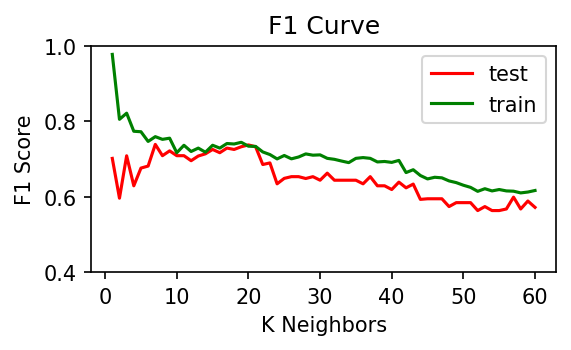

In [16]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

plt.show()

## Challenges with Test set

We change the train and test data by changing the random state and we get different results!!

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 0, stratify = y)

In [21]:
# calling above defined function
k = range(1,50)
train, test = F1score(k)

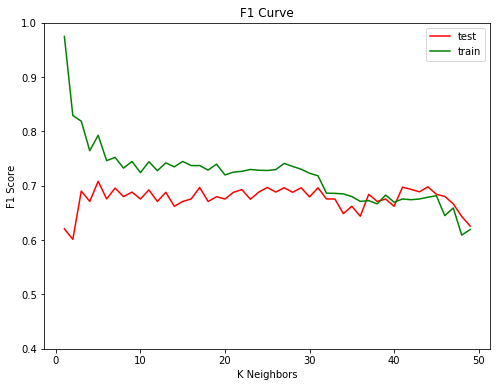

In [22]:
# plotting the Curves
plt.plot(k, test, color = 'red' , label = 'test')
plt.plot(k, train, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

plt.show()

Source: www.analyticsvidhya.com